In [1]:
from fipy import *

Moorcrfot & Lewis (1999) proposal:

$$ 0 = \nabla^2 u - \beta\nabla.(u\vec{x}) $$ (1)

Reducing to 1-D
$$ \frac{du}{dt} = \frac{d^2 u}{d x} - \beta\frac{d(u\vec{x})}{dx} $$  (2)

Let start to solve equation (2)

In [2]:
# Values
nx = 10
dx = 1.
mesh = Grid1D(nx=nx, dx=dx)
x = mesh.cellCenters[0]
xu = numerix.linspace(0, 100)

In [3]:
# Setting variable which retain our result
phi = CellVariable(name="solution variable", mesh=mesh, value=0.)
# Add inital condition
phi.setValue(1., where=(4 < x) & (6 > x))

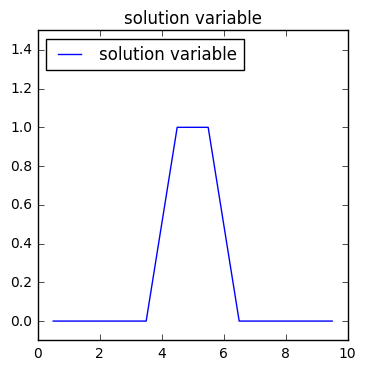

In [4]:
# Plotting inicial conditions
if __name__ == '__main__':
    viewer = Viewer(vars=phi, datamin=-0.1, datamax=1.5)
    viewer.plot()

In [5]:
# Setting Difussion and advection coefficients
D = 1.
C = ([1., -1.], )

In [6]:
# Equation with transientterm
eqX = TransientTerm() == DiffusionTerm(coeff=D) - \
                         ConvectionTerm(coeff=C)

I can not any vector function or element $ \vec{x} $ inside Convection term. How can do it?

In [7]:
# Solving the PDE
# time steps
timeStepDuration = 0.1
steps = 100
t = timeStepDuration * steps
# solve
for step in range(steps):
    eqX.solve(var=phi, dt=timeStepDuration)

AssertionError: 

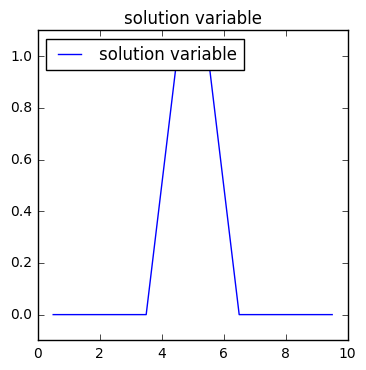

In [8]:
# Plotting results
if __name__ == '__main__':
    viewer = Viewer(vars=phi, datamin=-0.1, datamax=1.1)
    viewer.plot()

In [121]:
from fipy import *

# Setting mesh and discretising space
nx = 10
dx = 1.
mesh = Grid1D(nx=nx, dx=dx)
x = mesh.cellCenters[0]
x

CellVariable(value=array([[ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]]), mesh=UniformGrid1D(dx=1.0, nx=10))[index]

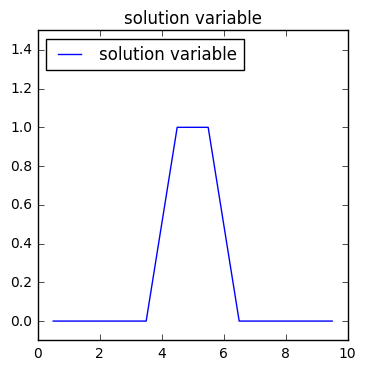

In [122]:
# Setting variable of results and adding inicial conditions
phi = CellVariable(name="solution variable", mesh=mesh, value=0.)
phi.setValue(1., where=(4 < x) & (6 > x))

# Plotting inicial conditions
if __name__ == '__main__':
    viewer = Viewer(vars=phi, datamin=-0.1, datamax=1.5)
    viewer.plot()

In [123]:
# Diffusion and convection coefficients
D = 1.
C = CellVariable(mesh=mesh, value=1)
C.setValue(-1, where=x > 5.)

# Setting PDE
eqX = TransientTerm() == DiffusionTerm(coeff=D) - \
                     ConvectionTerm(coeff=FaceVariable(value=C, mesh=mesh)) + CellVariable(value=phi, mesh=mesh)/(CellVariable(value=x, mesh=mesh)**2)

In [124]:
# Solving Transient term
timeStepDuration = 0.1
steps = 300
t = timeStepDuration * steps

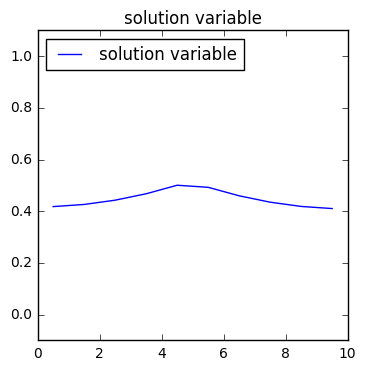

In [125]:
for step in range(steps):
    eqX.solve(var=phi, dt=timeStepDuration)

# Plotting results
if __name__ == '__main__':
    viewer = Viewer(vars=phi, datamin=-0.1, datamax=1.1)
    viewer.plot()

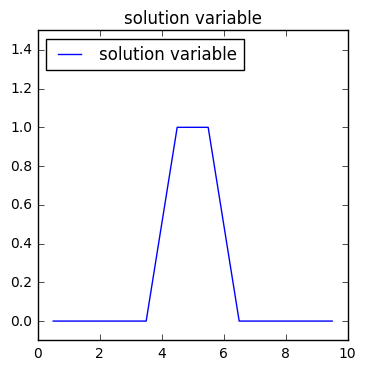

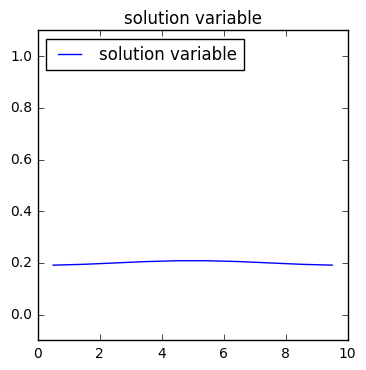

In [72]:
phi = CellVariable(name="solution variable", mesh=mesh, value=0.)
phi.setValue(1., where=(4 < x) & (6 > x))

# Plotting inicial conditions
if __name__ == '__main__':
    viewer = Viewer(vars=phi, datamin=-0.1, datamax=1.5)
    viewer.plot()

# Diffusion and convection coefficients
D = 1.
C = CellVariable(mesh=mesh, value=2)
C.setValue(-2, where=x > 5.)

# Setting PDE
eqX = TransientTerm() == DiffusionTerm(coeff=D)

# Solving Transient term
timeStepDuration = 0.1
steps = 100
t = timeStepDuration * steps

for step in range(steps):
    eqX.solve(var=phi, dt=timeStepDuration)

# Plotting results
if __name__ == '__main__':
    viewer = Viewer(vars=phi, datamin=-0.1, datamax=1.1)
    viewer.plot()

I am not sure, but model of Moorcroft consider $\beta$ parameter as a escalar a not as a vector. On the other hand, the vector $\vec{x}$ should point at center of home range, in this case center of domain, making convection bias towards center of home range. However the results plotting show convection moves towards directions specified by convection coefficient.

Conespecific avoidance

In [225]:
# Setting mesh and discretising space
nx = 100
dx = 1.
mesh = Grid1D(nx=nx, dx=dx)
x = mesh.cellCenters[0]
x

CellVariable(value=array([[  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
         27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
         36.5,  37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44.5,
         45.5,  46.5,  47.5,  48.5,  49.5,  50.5,  51.5,  52.5,  53.5,
         54.5,  55.5,  56.5,  57.5,  58.5,  59.5,  60.5,  61.5,  62.5,
         63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,  70.5,  71.5,
         72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,  80.5,
         81.5,  82.5,  83.5,  84.5,  85.5,  86.5,  87.5,  88.5,  89.5,
         90.5,  91.5,  92.5,  93.5,  94.5,  95.5,  96.5,  97.5,  98.5,
         99.5]]), mesh=UniformGrid1D(dx=1.0, nx=100))[index]

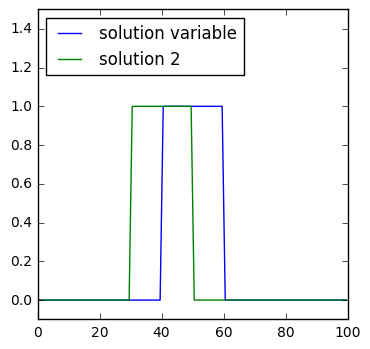

In [226]:
# Setting variable of results and adding inicial conditions
phi = CellVariable(name="solution variable", mesh=mesh, value=0.)
phi.setValue(1., where=(40 < x) & (60 > x))

u = CellVariable(name="solution 2", mesh=mesh, value=0.)
u.setValue(1., where=(30 < x) & (50 > x))

# Plotting inicial conditions
if __name__ == '__main__':
    viewer = Viewer(vars=(phi,u), datamin=-0.1, datamax=1.5)
    viewer.plot()

In [227]:
# Diffusion and convection coefficients
D = 1.
C1 = CellVariable(mesh=mesh, value=2)
C1.setValue(-2, where=x > 50.)

C2 = CellVariable(mesh=mesh, value=2)
C2.setValue(-2, where=x > 50.)

# Setting PDE
eqX = TransientTerm() == DiffusionTerm(coeff=D) - \
                     ConvectionTerm(coeff=FaceVariable(value=C1, mesh=mesh)) + CellVariable(value=phi, mesh=mesh)/(CellVariable(value=x, mesh=mesh)**2)

eqY = TransientTerm() == DiffusionTerm(coeff=D) - \
                     ConvectionTerm(coeff=FaceVariable(value=C2, mesh=mesh)) + CellVariable(value=u, mesh=mesh)/(CellVariable(value=x, mesh=mesh)**2)

In [229]:
# Solving Transient term
timeStepDuration = 0.1
steps = 200
t = timeStepDuration * steps

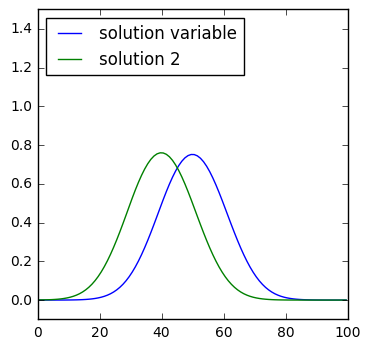

In [231]:
for step in range(steps):
    eqX.solve(var=phi, dt=timeStepDuration)
    eqY.solve(var=u, dt=timeStepDuration)

# Plotting results
if __name__ == '__main__':
    viewer = Viewer(vars=(phi,u), datamin=-0.1, datamax=1.5)
    viewer.plot()

Conespecific

In [366]:
# Setting mesh and discretising space
nx = 100
dx = 1.
mesh = Grid1D(nx=nx, dx=dx)
x = mesh.cellCenters[0]

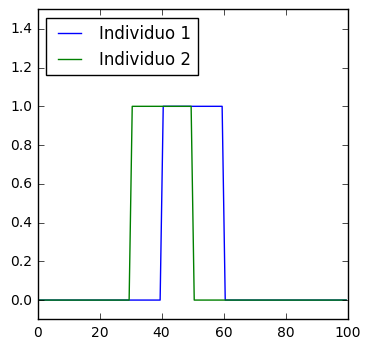

In [367]:
# Setting variable of results and adding inicial conditions
m = 1.
u1 = CellVariable(name="Individuo 1", mesh=mesh, value=0.)
u1.setValue(1., where=(40 < x) & (60 > x))

u2 = CellVariable(name="Individuo 2", mesh=mesh, value=0.)
u2.setValue(1., where=(30 < x) & (50 > x))

p = CellVariable(name= "Marcas Individuo 1", mesh=mesh, value=0.)
p.setValue(1., where=(40 < x) & (60 > x))

q = CellVariable(name= "Marcas Individuo 2", mesh=mesh, value=0.)
q.setValue(1., where=(30 < x) & (50 > x))

dp = u1*(1 + m*q) - p

dq = u2*(1 + m*p) - q

# Plotting inicial conditions
if __name__ == '__main__':
    viewer = Viewer(vars=(u1, u2), datamin=-0.1, datamax=1.5)
    viewer.plot()

In [368]:
# Diffusion and convection coefficients
D = 1.
C1 = CellVariable(mesh=mesh, value=2)
C1.setValue(-2, where=x > 50.)

C2 = CellVariable(mesh=mesh, value=2)
C2.setValue(-2, where=x > 50.)

# Setting PDE
equ1 = TransientTerm() == DiffusionTerm(coeff=D) - \
                     ConvectionTerm(FaceVariable(value=C1, mesh=mesh)) - u1*dq*C1 - (u1**2)*q/x**2
                                    
equ2 = TransientTerm() == DiffusionTerm(coeff=D) - \
                     ConvectionTerm(FaceVariable(value=C2, mesh=mesh)) - u2*dp*C2 - (u2**2)*p/x**2

In [369]:
# Solving Transient term
timeStepDuration = .1
steps = 20
t = timeStepDuration * steps

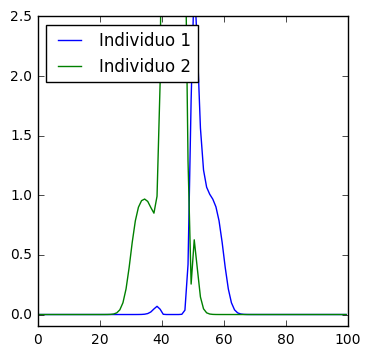

In [370]:
for step in range(steps):
    equ1.solve(var=u1, dt=timeStepDuration)
    equ2.solve(var=u2, dt=timeStepDuration)

# Plotting results
if __name__ == '__main__':
    viewer = Viewer(vars=(u1,u2), datamin=-0.1, datamax=2.5)
    viewer.plot()